# Statistics review 8: Qualitative data – tests of association

R code accompanying [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC420070/pdf/cc2428.pdf))

## Key learning points

- How to investigate relationships between two qualitative (categorical) variables
- $\chi^2$ test of association
- Test for trend (one variable is ordinal)
- Risk measurement
- Evaluating proportions

In [68]:
suppressPackageStartupMessages(library(tidyverse))

In [103]:
options(repr.plot.width=4, repr.plot.height=3)

## Categorical data

### Unordered

- sex
- blood group
- classification of disease
- whether the patient survived

### Ordinal

- Age group
- Clinical scales (e.g. Pain scale)

## $\chi^2$  test of association

In [1]:
none <-  c(686, 451, 168)
exit <- c(152, 35, 58)
bacteremia <- c(96, 38, 22)

o <- data.frame(none=none, exit=exit, bacteremia=bacteremia, 
                row.names= c("jugular", "subclavian", "femoral"))

### Observed counts

In [2]:
o

,none,exit,bacteremia
jugular,686,152,96
subclavian,451,35,38
femoral,168,58,22


In [3]:
m <- addmargins(as.matrix(o))
m

,none,exit,bacteremia,Sum
jugular,686,152,96,934
subclavian,451,35,38,524
femoral,168,58,22,248
Sum,1305,245,156,1706


### Expected counts

In [4]:
e <- outer(m[1:3,4], m[4,1:3]/m[4,4])
round(e, 1)

,none,exit,bacteremia
jugular,714.5,134.1,85.4
subclavian,400.8,75.3,47.9
femoral,189.7,35.6,22.7


### Calculate $\chi^2$ test statistic

In [5]:
T <- sum((o - e)^2/e)
round(T, 2)

[1] 51.26

In [6]:
df <- (nrow(o) -1) * (ncol(o)  - 1)
df

[1] 4

### Calculate p-value from $\chi^2$ distribution

In [7]:
1 - pchisq(T, df)

[1] 1.967748e-10

### Use built in test

In [8]:
chisq.test(o)


	Pearson's Chi-squared test

data:  o
X-squared = 51.262, df = 4, p-value = 1.968e-10


## Residuals

In [9]:
t <- addmargins(as.matrix(prop.table(o)))
t

,none,exit,bacteremia,Sum
jugular,0.40211020,0.08909730,0.05627198,0.5474795
subclavian,0.26436108,0.02051583,0.02227433,0.3071512
femoral,0.09847597,0.03399766,0.01289566,0.1453693
Sum,0.76494725,0.14361079,0.09144197,1.0000000


### Adjusted standardized residues

The numbers don't agree with table 4 in the paper. Student to check by hand calculations? 

In [10]:
round((o - e)/sqrt(e*(1-t[1:3,4])*(1-t[4,1:3])), 1)

,none,exit,bacteremia
jugular,-3.3,4.7,3.5
subclavian,3.3,-6.0,-1.9
femoral,-1.8,4.3,-0.2


## Two by two tables

In [24]:
treatment <- c(3, 47)
control <- c(8, 37)
df1 <- data.frame(treatment=treatment, contorl=control)
df1

treatment,contorl
3,8
47,37


In [25]:
chisq.test(df1, correct = FALSE)


	Pearson's Chi-squared test

data:  df1
X-squared = 3.2089, df = 1, p-value = 0.07324


## Fisher’s exact test

In [26]:
fisher.test(df1)


	Fisher's Exact Test for Count Data

data:  df1
p-value = 0.1083
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.04775944 1.35642029
sample estimates:
odds ratio 
 0.2989279 


## Yates’ continuity correction

In [27]:
chisq.test(df1, correct=TRUE)


	Pearson's Chi-squared test with Yates' continuity correction

data:  df1
X-squared = 2.1617, df = 1, p-value = 0.1415


## Test for trend

In [29]:
alert <- c(1110, 108)
vopr <- c(54, 14)
unresponsive <- c(14, 6)
df2 <- data.frame(alert=alert, vopr=vopr, unresponsive=unresponsive, 
                  row.names=c("sruvived", "died"))
df2

,alert,vopr,unresponsive
sruvived,1110,54,14
died,108,14,6


In [30]:
chisq.test(df2)

Warning message in chisq.test(df2):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  df2
X-squared = 19.383, df = 2, p-value = 6.18e-05


### Calling the trend test

The trend test takes two arguments

- Number of events
- Number of trials

So we have to a little massaging to get the data in the correct format.

#### We can use either row as the number of events

Using number of survivors.

In [42]:
prop.trend.test(as.matrix(df2[1,]), colSums(df2))


	Chi-squared Test for Trend in Proportions

data:  as.matrix(df2[1, ]) out of colSums(df2) ,
 using scores: 1 2 3
X-squared = 19.328, df = 1, p-value = 1.101e-05


Using number of deaths.

In [46]:
prop.trend.test(as.matrix(df2[2,]), colSums(df2))


	Chi-squared Test for Trend in Proportions

data:  as.matrix(df2[2, ]) out of colSums(df2) ,
 using scores: 1 2 3
X-squared = 19.328, df = 1, p-value = 1.101e-05


### Interpretation as slope of linear regression model

In [129]:
points <- c(replicate(1110, c(1,1)), replicate(108, c(1,2)), 
            replicate(54, c(2,1)),  replicate(14, c(2,2)), 
            replicate(14, c(3,1)), replicate(6, c(3,2)))

In [133]:
length(points)

[1] 2612

In [142]:
df3 <- data.frame(matrix(points, ncol=2, byrow = T))
colnames(df3) <- c("x", "y")

In [144]:
summary(lm(y ~ x - 1 , data=df3))


Call:
lm(formula = y ~ x - 1, data = df3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.81677  0.06108  0.06108  0.06108  1.06108 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x 0.938922   0.009996   93.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4085 on 1305 degrees of freedom
Multiple R-squared:  0.8711,	Adjusted R-squared:  0.871 
F-statistic:  8822 on 1 and 1305 DF,  p-value: < 2.2e-16


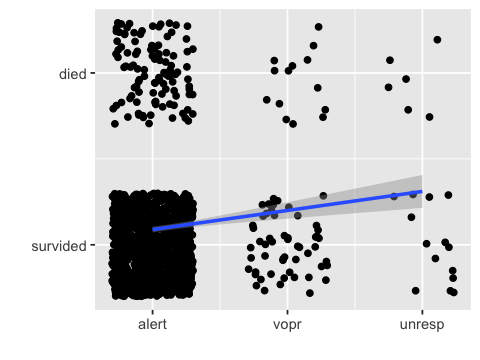

In [171]:
ggplot(df3, aes(x=x, y=y)) + geom_jitter(width = .3, height=.3) +
geom_smooth(method="lm") +
scale_x_continuous(breaks=1:3, labels=c("alert", "vopr", "unresp")) + 
scale_y_continuous(breaks=1:2, labels=c("survided", "died")) + 
xlab("") + ylab("")

## Measurement of risk

In [172]:
died <- c(38, 59)
survived <- c(79, 60)
df4 <- data.frame(died=died, survived=survived, row.names=c("early", "standard"))

In [173]:
df4

,died,survived
early,38,79
standard,59,60


#### Risk of death on early treatment

In [186]:
round(100*df4[1,1]/sum(df4[1,]), 1)

[1] 32.5

#### Risk of death on standard treatment

In [189]:
round(100*df4[2,1]/sum(df4[2,]), 1)

[1] 49.6

#### Odds of death on early treatment

In [193]:
round(df4[1,1]/sum(df4[1,2]), 2)

[1] 0.48

#### Odds of death on standard treatment

In [194]:
round(df4[2,1]/sum(df4[2,2]), 2)

[1] 0.98

### Confidence interval for a proportion

#### Confidence interval for death with early treatment

In [197]:
n <- sum(df4[1,])
p <- df4[1,1]/n

In [200]:
alpha <- 0.05
k <- qnorm(1 - alpha/2)
se <- sqrt(p*(1-p)/n)
round(100*c(p - k*se, p + k*se), 1)

[1] 24 41

#### Confidence interval for death with early treatment

In [201]:
n <- sum(df4[2,])
p <- df4[2,1]/n

In [202]:
alpha <- 0.05
k <- qnorm(1 - alpha/2)
se <- sqrt(p*(1-p)/n)
round(100*c(p - k*se, p + k*se), 1)

[1] 40.6 58.6

### Comparing risks

#### Risk ratio (relative risk)

In [214]:
round(df4[1,1]/sum(df4[1,])/ (df4[2,1]/sum(df4[2,])), 2)

[1] 0.66

#### Odds ratio

In [217]:
round((df4[1,1]/sum(df4[1,2]))/(df4[2,1]/sum(df4[2,2])), 2)

[1] 0.49

## Testing for difference between two proportions

In [218]:
df4

,died,survived
early,38,79
standard,59,60


In [226]:
df4 <- df4 %>% mutate(total=died+survived)
df4

died,survived,total
38,79,117
59,60,119


In [229]:
prop.test(df4[,1], df4[,3], correct = FALSE)


	2-sample test for equality of proportions without continuity
	correction

data:  df4[, 1] out of df4[, 3]
X-squared = 7.1271, df = 1, p-value = 0.007593
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.29458384 -0.04744015
sample estimates:
   prop 1    prop 2 
0.3247863 0.4957983 


## Matched samples

In [230]:
breath_plus <- c(40, 4)
breath_minus <- c(8, 32)
df5 <- data.frame(breath_plus=breath_plus, breath_minus=breath_minus,
                 row.names=c("xxoid_plus", "oxoid_minus"))
df5

,breath_plus,breath_minus
xxoid_plus,40,8
oxoid_minus,4,32


### Manual (with Yates correction)

In [233]:
T <- ((8-4)-1)^2/((8+4))
T

[1] 0.75

In [235]:
round(1 - pchisq(T, 1), 4)

[1] 0.3865

### Using built in test

In [232]:
mcnemar.test(as.matrix(df5))


	McNemar's Chi-squared test with continuity correction

data:  as.matrix(df5)
McNemar's chi-squared = 0.75, df = 1, p-value = 0.3865


## Exercises

In [237]:
suppressPackageStartupMessages(library(MASS))

### The rows indicate smoking history, and the columns indicate frequency of exercise

The allowed values in Smoke are "Heavy", "Regul" (regularly), "Occas" (occasionally) and "Never", and "Freq" (frequently), "Some" and "None" for Exercise.

In [238]:
tbl = table(survey$Smoke, survey$Exer) 
tbl

       
        Freq None Some
  Heavy    7    1    3
  Never   87   18   84
  Occas   12    3    4
  Regul    9    1    7

**1**. Is there a evidence for a relationship between smoking history and frequency of exercise? Solve this a) by manual calculation, and b) by using the chisq.test.

**2**. Is there evidence for a trend for exercise with frequency of smoking if we consider smoking as an ordinal variables?

**3**. Create a new table that uses only the (Freq, None) columns and (Heavy, Never) rows. Compare the results of the $\chi^2$ test with and without Yates continuity correction, as well as the Fisher exact test.